In [30]:
% matplotlib inline

In [32]:
myers = 'data/571976_data.csv'
bumgarner = 'data/518516_data.csv'
                
pitch_map = {
    'AB': 'Automatic Ball',
    'AS': 'Automatic Strike',
    'CH': 'Changeup',
    'CU': 'Curveball',
    'EP': 'Eephus',
    'FC': 'Cutter',
    'FF': 'Four-Seam Fastball',
    'FO': 'Forkball',
    'FS': 'Splitter',
    'FT': 'Two-Seam Fastball (synonymous with SI)',
    'GY': 'Gyroball',
    'IN': 'Intentional Ball',
    'KC': 'Knuckle Curve',
    'KN': 'Knuckleball',
    'NP': 'No Pitch',
    'PO': 'Pitchout',
    'SC': 'Screwball',
    'SI': 'Sinker (synonymous with FT)',
    'SL': 'Slider',
    'UN': 'Unknown',
}

In [22]:
import pandas


bumgarner_df = pandas.read_csv(bumgarner)
bumgarner_df.head()

,pitch_type,pitch_id,game_date,start_speed,x0,z0,player_name,batter,pitcher,events,...,az,sz_top,sz_bot,hit_distance_sc,hit_speed,hit_angle,effective_speed,release_spin_rate,release_extension,game_pk
0,FF,14,2017-04-13,89.93,2.64864384795279,5.62297484868821,Madison Bumgarner,571448,518516,Walk,...,-12.12,3.47,1.59,null,null,null,89.64,2270,6.42,490232
1,FF,15,2017-04-13,92.46,2.47657616723997,5.65926433476207,Madison Bumgarner,571448,518516,Walk,...,-14.07,3.47,1.59,null,null,null,92.55,2275,6.69,490232
2,FF,16,2017-04-13,90.74,2.79717512361075,5.46312639995038,Madison Bumgarner,571448,518516,Walk,...,-10.88,3.47,1.59,null,null,null,90.58,2173,6.35,490232
3,SL,17,2017-04-13,86.62,2.5552190961025,5.53683207905381,Madison Bumgarner,571448,518516,Walk,...,-18.60,3.47,1.59,null,null,null,86.25,2235,6.14,490232
4,CU,18,2017-04-13,79.79,2.4994766921678,5.51427932173449,Madison Bumgarner,571448,518516,Walk,...,-37.10,3.47,1.59,null,null,null,78.62,2513,5.76,490232


In [23]:
# Drop null rows
bumgarner_df = bumgarner_df[bumgarner_df['pitch_type'] != 'null']

In [24]:
ff_df = bumgarner_df[bumgarner_df['pitch_type'] == 'FF']
ff_df.head()

,pitch_type,pitch_id,game_date,start_speed,x0,z0,player_name,batter,pitcher,events,...,az,sz_top,sz_bot,hit_distance_sc,hit_speed,hit_angle,effective_speed,release_spin_rate,release_extension,game_pk
0,FF,14,2017-04-13,89.93,2.64864384795279,5.62297484868821,Madison Bumgarner,571448,518516,Walk,...,-12.12,3.47,1.59,null,null,null,89.64,2270,6.42,490232
1,FF,15,2017-04-13,92.46,2.47657616723997,5.65926433476207,Madison Bumgarner,571448,518516,Walk,...,-14.07,3.47,1.59,null,null,null,92.55,2275,6.69,490232
2,FF,16,2017-04-13,90.74,2.79717512361075,5.46312639995038,Madison Bumgarner,571448,518516,Walk,...,-10.88,3.47,1.59,null,null,null,90.58,2173,6.35,490232
5,FF,19,2017-04-13,91.35,2.63072781737248,5.82277367223198,Madison Bumgarner,571448,518516,Walk,...,-13.03,3.47,1.59,null,null,null,91.54,2144,6.83,490232
6,FF,24,2017-04-13,92.03,2.25640765467802,5.65274936135248,Madison Bumgarner,471865,518516,Strikeout,...,-13.35,3.41,1.57,null,null,null,92.23,2237,6.75,490232


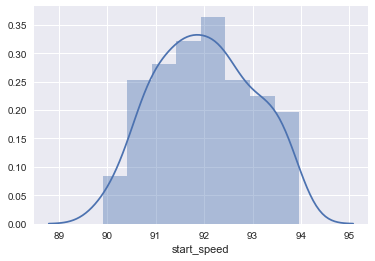

In [31]:
import seaborn


seaborn.distplot(ff_df['start_speed'].astype(float))

In [44]:
bumgarner_df['pitch_name'] = [pitch_map[pitch] for pitch in bumgarner_df['pitch_type']]

for key in ['start_speed', 'spin_rate']:
    bumgarner_df[key] = bumgarner_df[key].astype(float)

bumgarner_df.head()

,pitch_type,pitch_id,game_date,start_speed,x0,z0,player_name,batter,pitcher,events,...,sz_bot,hit_distance_sc,hit_speed,hit_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitch_name,count
0,FF,14,2017-04-13,89.93,2.64864384795279,5.62297484868821,Madison Bumgarner,571448,518516,Walk,...,1.59,null,null,null,89.64,2270,6.42,490232,Four-Seam Fastball,1
1,FF,15,2017-04-13,92.46,2.47657616723997,5.65926433476207,Madison Bumgarner,571448,518516,Walk,...,1.59,null,null,null,92.55,2275,6.69,490232,Four-Seam Fastball,1
2,FF,16,2017-04-13,90.74,2.79717512361075,5.46312639995038,Madison Bumgarner,571448,518516,Walk,...,1.59,null,null,null,90.58,2173,6.35,490232,Four-Seam Fastball,1
3,SL,17,2017-04-13,86.62,2.5552190961025,5.53683207905381,Madison Bumgarner,571448,518516,Walk,...,1.59,null,null,null,86.25,2235,6.14,490232,Slider,1
4,CU,18,2017-04-13,79.79,2.4994766921678,5.51427932173449,Madison Bumgarner,571448,518516,Walk,...,1.59,null,null,null,78.62,2513,5.76,490232,Curveball,1


In [55]:
import numpy


bumgarner_df['count'] = [1]*len(bumgarner_df)

pitch_df = bumgarner_df.groupby('pitch_type').agg({
    'count': len,
    'start_speed': [numpy.mean, numpy.std],
    'spin_rate': [numpy.mean, numpy.std],
})

pitch_df

count start_speed              spin_rate            
             len        mean       std         mean         std
pitch_type                                                     
CH            17   83.961176  0.843059  1543.555882  349.091146
CU            55   77.937273  1.094093  1296.894382  431.104902
FC             2   92.955000  0.346482  2018.612500  100.479166
FF           141   92.016879  1.005133  2127.634156  448.203468
FT             2   92.820000  0.098995  1575.800500  185.664320
SL            83   87.690723  1.246237  1318.514916  379.827741

<Container object of 6 artists>

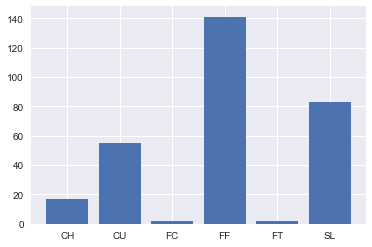

In [57]:
from matplotlib import pyplot

xs = range(len(pitch_df))
counts = pitch_df[('count', 'len')]

pyplot.bar(xs, counts, tick_label=pitch_df.index)

<Container object of 6 artists>

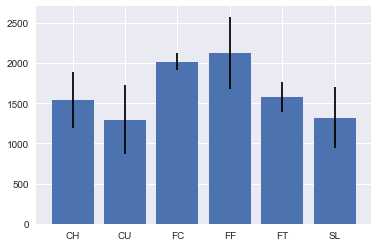

In [58]:
spin_rate_means = pitch_df[('spin_rate', 'mean')]
spin_rate_stds = pitch_df[('spin_rate', 'std')]

pyplot.bar(xs, spin_rate_means, yerr=spin_rate_stds, tick_label=pitch_df.index)